<a href="https://colab.research.google.com/github/ACTH-DKES/ACTH2025/blob/main/week5/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From two weeks ago...

In [ ]:
class CulturalObject:
    location = "Unknown"  # Class attribute shared across all instances

    def __init__(self, title, creator, year, medium, is_authentic=True,
                 condition_score=10):
        if not isinstance(condition_score, int): # condition
            raise TypeError("condition_score must be an integer.") # ERROR1
        if not (0 <= condition_score <= 10):
            raise ValueError("condition_score must be between 0 and 10.") # ERROR2

        self.title = title
        self.creator = creator
        self.year = year
        self.medium = medium
        self.is_authentic = is_authentic
        self.condition_score = condition_score

    def relocate(self, new_location):
        CulturalObject.location = new_location

    def describe_basic(self):
        authenticity = "authentic" if self.is_authentic else "replica"
        return f"'{self.title}' by {self.creator}, {authenticity}, {self.year}, {self.medium}, condition: {self.condition_score}/10."

    def citation(self, location):
        return f"{self.creator}. ({self.year}). {self.title}. {self.medium}. {location}."



In [ ]:
sample_object = CulturalObject("Sample Title", "Sample Creator", 1999, "Sample Medium")

In [ ]:
print(sample_object)

## Printing an object

If not specified, the printing of an object will look like what you see above. If you want to give a specific printing style to an object, you need to add the `__repr__` method to it.

`__repr__` is a special method in Python that defines how an object is represented when you print it (or inspect it in the console). It’s short for “representation”, and it's meant to return a string that unambiguously describes the object, ideally one that could be used to recreate it.

In [ ]:
class CulturalObject:
    location = "Unknown"  # Class attribute shared across all instances

    def __init__(self, title, creator, year, medium, is_authentic=True,
                 condition_score=10):
        if not isinstance(condition_score, int): # condition
            raise TypeError("condition_score must be an integer.") # ERROR1
        if not (0 <= condition_score <= 10):
            raise ValueError("condition_score must be between 0 and 10.") # ERROR2

        self.title = title
        self.creator = creator
        self.year = year
        self.medium = medium
        self.is_authentic = is_authentic
        self.condition_score = condition_score

    def relocate(self, new_location):
        CulturalObject.location = new_location

    def describe_basic(self):
        authenticity = "authentic" if self.is_authentic else "replica"
        return f"'{self.title}' by {self.creator}, {authenticity}, {self.year}, {self.medium}, condition: {self.condition_score}/10."

    def citation(self, location):
        return f"{self.creator}. ({self.year}). {self.title}. {self.medium}. {location}."
    #REPRESENTATION; IDEALLY, ONE COULD RECREATE THE OBJECT BY COPYING AND
    #PASTING THIS CONTENT
    def __repr__(self):
        return f"CulturalObject('{self.title}', '{self.creator}', {self.year}, '{self.medium}', {self.is_authentic}, {self.condition_score})"

In [ ]:
sample_object = CulturalObject("Sample Title", "Sample Creator", 1999, "Sample Medium")
print(sample_object)

# Graph Databases and Linked Data part 1

Previously, we have seen how to handle tabular data via pandas and dataframe.

Graph data is different from tabular data, it is usually expressed in triples of **subject-predicate-object**

Linked (open) data is a specific set of principles to publish data online. It follows RDF (Resource description framework). In RDF, triples are expressed with subject-predicate-object structure. Additionally, subject and predicates (and sometimes objects) are expressed with URIs (Uniform resource identifier) -> basically URLs (uniform resource locator) to identify specific entities in the web.

Graphs databases that follow linked data principles are also called knowledge graphs.



The properties expressed in knowledge graphs (the relationships that link a subject with an object), are usually taken from Ontologies, which are specific shared vocabularies to express information in Linked Data. Ontologies are essential to grant interoperability between different knowledge graphs published online. They are (in most cases) also used to specify the **type** of entities in a knowledge graph. All the types, also called classes, and properties of an ontology are assigned URIs.

A URI is typically composed by a Namespace (i.e., https://w3id.org/example/) plus the specific sequence of characters to identify an entity (i.e., bruno). The URI for Bruno according to the Namespace of example could be https://w3id.org/example/bruno . Because namespaces can be repeated multiple types in a knowledge graphs, they are usually abbreviated via prefixes. For instance, you could use the "ex:" prefix to abbreviate https://w3id.org/example/. So, Bruno can be expressed by writing ex:bruno .

There are different ways to formalize knowledge graphs (https://www.w3.org/wiki/RdfSyntax), they can be formalized in the Turtle Language, Ntriples, RDF/XML...Let's take Turtle for example.

The FOAF (friend of a friend) ontology (http://xmlns.com/foaf/spec/) has the Namespace "http://xmlns.com/foaf/0.1/". In this ontology, there is the property foaf:knows, which is used to connect two entities of the class foaf:Person. Therefore I can say ex:bruno foaf:knows ex:valentina. In turtle, I would express this with this syntax:



```turtle
@prefix ex: <https://w3id.org/example/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .

ex:bruno foaf:knows ex:valentina .
```
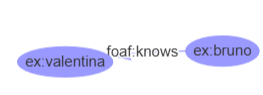

Knowledge graph, as objects (**only**), can also have information not expressed in URIs, but in literals. A literal, compared to a URI, cannot be the new subject of a new triple. For instance, I can use the foaf property foaf:age to say that Valentina is 30 years old.

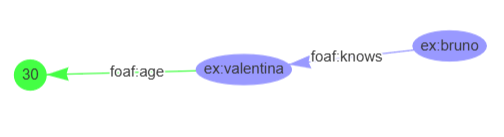

```turtle
@prefix ex: <https://w3id.org/example/> .
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema/> .

ex:bruno foaf:knows ex:valentina .
ex:valentina foaf:age "30"^^xsd:integer .
```

While I can reuse the object of the triple ex:valentina as the subject of a new triple, I can't use "30" as the subject of a new triple. Literals are meant to give data about a specific entity, but are not meant to represent that data as a URI.

In CH you might want to say:

"This artifact was created by that artist"

"This artifact is located at this museum"

"This artifact has this title"

RDF allows you to express these as structured facts with machine-readable semantics.

## CH Ontologies: CIDOC CRM and Dublin Core

To model data in a semantically meaningful way, we rely on **shared vocabularies**:

### Dublin Core (`dc:`)
Dublin Core offers generic metadata properties like:
- `dc:title`
- `dc:creator`
- `dc:date`

It’s lightweight and widely used across disciplines.

### CIDOC CRM (`crm:`)
CIDOC CRM is a formal ontology for cultural heritage. It describes:
- Physical objects (e.g. `E22_Man-Made_Object`)
- Persons and groups (`E21_Person`)
- Places (`E53_Place`)
- Relationships like `P55_has_current_location`, `P14_carried_out_by`, etc.

We will see these today in the examples


# How to read and create RDF files in python

We can use rdflib, a library created to handle RDF data. Rdflib docs: https://rdflib.readthedocs.io/en/stable/

In [ ]:
# Setup: install rdflib

!pip install rdflib

### rdflib.Graph

A `Graph()` is the core data structure in RDFLib. It's

It holds all the RDF triples.

To use it you need to call its constructor method (does it ring a bell?)

In [ ]:
from rdflib import Graph
g = Graph()

You can:

`.parse()` → Load RDF data (from string, file, or URL)

`.add()` / `.remove()` → Add or delete triples

`.triples()` → Iterate over triples

`.subjects()`, `.predicates()`, `.objects()` → Iterate or filter using predicates, subjects or objects

`.value()` → Get a single object from a known subject/predicate pair

`.serialize()` → Export RDF

### `graph.parse(data=..., format=...)`

Loads RDF into the graph. You can use:
- `data=` to provide a Turtle/N-Triples string
- `location=` to load from file or URL
- `format=` must match the syntax: `turtle`, `xml`, `n3`, `nt`, `json-ld`

In [ ]:
turtle_data = """
@prefix ex: <http://w3id.org/example/> .
@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:artifact001 a crm:E22_Man-Made_Object ;
    dc:title "Roman coin" ;
    dc:creator ex:artist001 ;
    crm:P55_has_current_location ex:museum001 .

ex:artist001 a crm:E21_Person ;
    rdfs:label "Unknown Roman artist" .

ex:museum001 a crm:E53_Place ;
    rdfs:label "Museum of Ancient History" .
"""

g = Graph()
g.parse(data=turtle_data, format="turtle")
print(f"Loaded graph with {len(g)} triples.")


In [ ]:
# or

g2 = Graph()
g.parse("example_t.ttl", format="ttl") #if you upload the file example_t.ttl in the notebook

In [ ]:
# or

g3 = Graph()

g.parse(location="", format="ttl") # add the github link to the same file

### Namespace(uri)

`rdflib.namespace.Namespace` lets us shorten URIs for readability.

We also **bind** prefixes so the graph knows how to serialize them. Some namespaces, for rdfs, foaf, rdf are already built in rdflib

In [ ]:
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace

CRM = Namespace("http://www.cidoc-crm.org/cidoc-crm/") #creating a namespace object
DC = Namespace("http://purl.org/dc/elements/1.1/")
EX = Namespace("http://w3id.org/example/")

g.bind("crm", CRM) # binding it to the graph so when we serialize it, it will use
#crm:something instead of the full namespace
g.bind("dc", DC)
g.bind("ex", EX)

### graph.triples((s, p, o))

This lets us search all matching triples.
- Use `None` as a wildcard for subject, predicate, or object.
- Returns a generator of `(subject, predicate, object)` tuples.

In [ ]:
for s, p, o in g.triples((None, None, None)):
    print(f"{s} -- {p} --> {o}")

### graph.subjects(predicate=X, object=Y)
Returns all subjects matching (s, X, Y)

***

### graph.predicates(subject=X, object=Y)
Returns all predicates matching (X, p, Y)

***

### graph.objects(subject=X, predicate=Y)
Returns all objects matching (X, Y, o)

### Syntax for elements in .triples, .predicates, .objects, .subjects

Inside the `.triples()` you can have either `None` or the specific URI. To call an entity for a URI with a specific namespace there are three ways.

1. Use `namespace_variable.entity_name` for instance `DC.creator`
2. Use `namespace_variable["entity_name"]` for instance `DC["creator"]`
3. Use URIRef constructor method with the parameter of the full uri, for instance `URIRef("http://purl.org/dc/elements/1.1/creator")`


In [ ]:
from rdflib import URIRef

# Subjects that are man-made objects
for s in g.subjects(RDF.type, CRM["E22_Man-Made_Object"]): # we have to use this
# other syntax because "-" is wrongly interpreted by python
# so you can't write CRM.E22_Man-Made_Object
    print("Artifact:", s)

# Objects that are creators
for o in g.objects(None, DC.creator):
    print("Creator:", o)

# Predicates used between artifact001 and museum001

for p in g.predicates(EX.artifact001, URIRef("http://w3id.org/example/museum001")):
    print("Predicates between artifact001 and museum001: ", p)


### Accessing a Single Value with .value()

Returns the first object for (s, p)

Useful if you just want a single value (e.g., a label).

In [ ]:
label = g.value(subject=EX["artist001"], predicate=RDFS.label)
print("Label of artist001:", label)

### You could also do

for label in g.objects(EX["artist001"], RDFS.label):
    print("Label of artist001:", label)

### or

for s,p,o in g.triples((EX["artist001"], RDFS.label, None)):
    print("Label of artist001:", o)

### Adding Triples with .add()

Adds a single RDF triple to the graph.

- `s` and `o` are `URIRef` (for uris) or `Literal(...)` (for values)
- `p` is a `URIRef`

In [ ]:
from rdflib import Literal

artifact2 = EX["artifact002"]
g.add((artifact2, RDF.type, CRM["E22_Man-Made_Object"]))
g.add((artifact2, DC.title, Literal("Greek amphora")))
g.add((artifact2, DC.creator, EX.artist002))
g.add((artifact2, EX.random_useless_predicate, EX.random_useless_object))

### print the graph

You can use .serialize (more on this later) + print to print the graph

In [ ]:
print(g.serialize(format="ttl"))

### Removing Triples with .remove()

Deletes all triples that match `(s, p, o)`. You can use `None` to wildcard.

In [ ]:
# Remove the triples with useless predicates

g.remove((None, EX.random_useless_predicate, None))

In [ ]:
print(g.serialize(format="ttl"))

### Serializing with .serialize()

You can specify a destination (path - only filename if you want the file to be saved in the same folder as this jupyter notebook) as a parameter if you want to save the file instead of printing it.

Outputs the RDF in your chosen format.
Options include:
- `"turtle"`
- `"xml"`
- `"nt"` (N-Triples)
- `"json-ld"`


In [ ]:
g.serialize(destination="example_new.ttl", format="turtle")

### Graph() + Graph()

The `+` operator in RDFLib **merges** two graphs into a new graph.

It returns a third graph containing all triples from both.

The original graphs remain unchanged.

In [ ]:
turtle_data_2 = """
@prefix ex: <http://example.org/> .
@prefix crm: <http://www.cidoc-crm.org/cidoc-crm/> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .

ex:artifact003 a crm:E22_Man-Made_Object ;
    dc:title "Medieval chalice" ;
    dc:creator ex:artist003 ;
    crm:P55_has_current_location ex:museum002 .

ex:artist003 a crm:E21_Person ;
    rdfs:label "Anonymous goldsmith" .

ex:museum002 a crm:E53_Place ;
    rdfs:label "Cathedral Treasury of Siena" .
"""

g2 = Graph()
g2.parse(data=turtle_data_2, format="turtle")

# Bind namespaces again (good practice)
g2.bind("ex", EX)
g2.bind("crm", CRM)
g2.bind("dc", DC)

# Combine the two graphs
g_combined = g + g2

print(f"Graph 1: {len(g)} triples")
print(f"Graph 2: {len(g2)} triples")
print(f"Combined: {len(g_combined)} triples")

> **Exercise 1: Create a new RDF graph for a cultural heritage artifact**

Create a new `Graph` in RDFLib and describe a **tapestry** from the 16th century using the same structure as the examples you’ve seen.

### Follow these exact instructions:

1. **Artifact**
   - URI: `ex:artifact004`
   - Type: `crm:E22_Man-Made_Object`
   - Title: `"Renaissance tapestry"` (use `dc:title`)
   - Creator: `ex:artist004` (use `dc:creator`)
   - Location: `ex:museum003` (use `crm:P55_has_current_location`)

2. **Artist**
   - URI: `ex:artist004`
   - Type: `crm:E21_Person`
   - Label: `"Flemish workshop"` (use `rdfs:label`)

3. **Museum**
   - URI: `ex:museum003`
   - Type: `crm:E53_Place`
   - Label: `"Royal Palace of Madrid"` (use `rdfs:label`)

### Additional requirements:

- Bind the following namespaces:
  - `ex` → `http://example.org/`
  - `crm` → `http://www.cidoc-crm.org/cidoc-crm/`
  - `dc` → `http://purl.org/dc/elements/1.1/`
- Use `Literal(...)` for strings
- Use square brackets (`[...]`) for accessing `CRM` terms that might be problematic (e.g., `CRM["E22_Man-Made_Object"]`)

Serialize the graph in the end by printing it.


<details><summary>Solution</summary>
<pre>
from rdflib import Graph, Literal, Namespace
from rdflib.namespace import RDF, RDFS

EX = Namespace("http://w3id.org/example/")
CRM = Namespace("http://www.cidoc-crm.org/cidoc-crm/")
DC = Namespace("http://purl.org/dc/elements/1.1/")

g3 = Graph()
g3.bind("ex", EX)
g3.bind("crm", CRM)
g3.bind("dc", DC)

artifact = EX["artifact004"]
g3.add((artifact, RDF.type, CRM["E22_Man-Made_Object"]))
g3.add((artifact, DC.title, Literal("Renaissance tapestry")))
g3.add((artifact, DC.creator, EX["artist004"]))
g3.add((artifact, CRM["P55_has_current_location"], EX["museum003"]))

g3.add((EX["artist004"], RDF.type, CRM["E21_Person"]))
g3.add((EX["artist004"], RDFS.label, Literal("Flemish workshop")))

g3.add((EX["museum003"], RDF.type, CRM["E53_Place"]))
g3.add((EX["museum003"], RDFS.label, Literal("Royal Palace of Madrid")))

print(g3.serialize(format="turtle"))
</pre><details>


> **Exercise 2: Combine your graph with the others**

Now that you've created a new RDF graph describing `artifact004`, you will combine it with the existing graphs from the class.

You should already have:

- `g` → first graph with artifact001 and artist001
- `g2` → second graph with artifact003 and artist003
- `g3` → your new graph with artifact004 and artist004

### Task:

1. Create a new graph called `g_combined_all` by combining `g`, `g2`, and `g3` using the `+` operator
2. Print how many triples are in the resulting graph
3. Use `.serialize()` to preview the result in Turtle format


<details><summary>Solution</summary><pre>
g_combined_all = g + g2 + g3
print(g_combined_all.serialize(format="turtle"))
</pre></details>

### Exercise 3 (at home)

You will now explore the contents of the `g_combined_all` graph and retrieve relationships between **museums** and **artifacts**.

### Task:

1. Iterate over all subjects of type `crm:E53_Place` (i.e., all museums)
2. For each museum:
   - Get its label using `rdfs:label`
   - Find all artifacts (`crm:E22_Man-Made_Object`) that are located there (use `crm:P55_has_current_location`)
   - Print the title of each artifact (use `dc:title`)

### Expected Output:
A list of museums and the artifacts currently located in each.

<details><summary>Solution</summary><pre>
for museum in g_combined_all.subjects(RDF.type, CRM["E53_Place"]):
    for label in g_combined_all.objects(museum, RDFS.label):
        print(f"\nMuseum: {label}")
    for artifact in g_combined_all.subjects(CRM["P55_has_current_location"], museum):
        for title in g_combined_all.objects(artifact, DC.title):
            print(f"  - {title}")</pre>